<a href="https://colab.research.google.com/github/anushkakenkre/Resnet-50/blob/main/Resnet_50_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/train.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/test.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/valid.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
print(keras.__version__)

2.15.0


In [ ]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

In [ ]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [ ]:
train_generator = data_generator.flow_from_directory(
    '/content/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')


Found 2337 images belonging to 2 classes.


In [ ]:
import numpy as np


# Optionally, check the data types before conversion
data_batch = next(train_generator)
print("Original Data Types:")
print("Violence:", data_batch[0].dtype)
print("Non_Violence:", data_batch[1].dtype)

# Convert the image dataset from float32 to int64
train_generator = ((np.array(batch[0], dtype=np.int64), np.array(batch[1], dtype=np.int64)) for batch in train_generator)

# Optionally, check the data types after conversion
data_batch = next(train_generator)
print("\nConverted Data Types:")
print("Violence:", data_batch[0].dtype)
print("Non_Violence:", data_batch[1].dtype)


Original Data Types:
Violence: float32
Non_Violence: float32

Converted Data Types:
Violence: int64
Non_Violence: int64


In [ ]:
validation_generator = data_generator.flow_from_directory(
    '/content/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 662 images belonging to 2 classes.


In [ ]:
import numpy as np


# Optionally, check the data types before conversion
data2_batch = next(validation_generator)
print("Original Data Types:")
print("Violence:", data2_batch[0].dtype)
print("Non_Violence:", data2_batch[1].dtype)

# Convert the image dataset from float32 to int64
validation_generator = ((np.array(batch[0], dtype=np.int64), np.array(batch[1], dtype=np.int64)) for batch in validation_generator)

# Optionally, check the data types after conversion
data2_batch = next(validation_generator)
print("\nConverted Data Types:")
print("Violence:", data2_batch[0].dtype)
print("Non_Violence:", data2_batch[1].dtype)


Original Data Types:
Violence: float32
Non_Violence: float32

Converted Data Types:
Violence: int64
Non_Violence: int64


In [ ]:
model = Sequential()
#model = tensorflow.keras.Sequential()

In [ ]:
model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.layers

In [ ]:
model.layers[0].layers

In [ ]:
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
total_samples_training = 2337
total_samples_validation = 662  # Replace with the total number of validation samples


steps_per_epoch_training = total_samples_training // batch_size_training
steps_per_epoch_validation = total_samples_validation // batch_size_validation

num_epochs = 10

In [ ]:
fit_history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/10
23/23 [==============================] - 34s 1s/step - loss: 0.2796 - accuracy: 0.9285 - val_loss: 0.1874 - val_accuracy: 0.9537
Epoch 2/10
23/23 [==============================] - 13s 571ms/step - loss: 0.1026 - accuracy: 0.9674 - val_loss: 0.1009 - val_accuracy: 0.9680
Epoch 3/10
23/23 [==============================] - 13s 569ms/step - loss: 0.0653 - accuracy: 0.9809 - val_loss: 0.0606 - val_accuracy: 0.9875
Epoch 4/10
23/23 [==============================] - 12s 524ms/step - loss: 0.0458 - accuracy: 0.9875 - val_loss: 0.0621 - val_accuracy: 0.9804
Epoch 5/10
23/23 [==============================] - 12s 521ms/step - loss: 0.0373 - accuracy: 0.9893 - val_loss: 0.0527 - val_accuracy: 0.9858
Epoch 6/10
23/23 [==============================] - 12s 518ms/step - loss: 0.0342 - accuracy: 0.9915 - val_loss: 0.0621 - val_accuracy: 0.9786
Epoch 7/10
23/23 [==============================] - 13s 583ms/step - loss: 0.0213 - accuracy: 0.9942 - val_loss: 0.0348 - val_accuracy: 0.9911
Ep

In [ ]:
model.save('resnet_50.keras')

In [ ]:
test_generator = data_generator.flow_from_directory(
    '/content/test',
    target_size=(image_resize, image_resize),
    shuffle=False)

Found 334 images belonging to 2 classes.


In [ ]:
steps_per_epoch_test = 334/ batch_size_validation

In [ ]:
score=model.evaluate(test_generator, steps=steps_per_epoch_test)

3/3 [==============================] - 4s 146ms/step - loss: 0.0350 - accuracy: 0.9844


In [ ]:
print('Accuracy of ResNet50: {}% \n Error: {}'.format(score[1], 1 - score[1]))

Accuracy of ResNet50: 0.984375% 
 Error: 0.015625


Step 3:
TESTING

In [ ]:
import numpy as np

In [ ]:
predict = model.predict(test_generator, steps=steps_per_epoch_test)

3/3 [==============================] - 1s 153ms/step


In [ ]:
# get the dictionary of classes
label2index = test_generator.class_indices

# obtain the list of classes
list_of_label = list(label2index.keys())
print("The list of classes: ", list_of_label)

The list of classes:  ['Non_Violence', 'Violence']


In [ ]:
print("ResNet50 Predictions :")
for i in range(0,5):
    pred_class = np.argmax(predict[i])
    pred_label = list_of_label[pred_class]
    print('Prediction :{}'.format(
        pred_label,
        predict[i][pred_class]))

ResNet50 Predictions :
Prediction :Non_Violence
Prediction :Non_Violence
Prediction :Non_Violence
Prediction :Non_Violence
Prediction :Violence


In [ ]:
import os
import random
from PIL import Image
import numpy as np

# Path to your test directory
test_directory = '/content/test/Non-Violence'

# Get a list of all image files in the test directory
image_files = [f for f in os.listdir(test_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Choose a random subset of images (e.g., 5 images)
num_images_to_choose = 5
random_images = random.sample(image_files, num_images_to_choose)

# Load and preprocess the random images
random_images_data = []
for image_file in random_images:
    image_path = os.path.join(test_directory, image_file)
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize to match the input size expected by the model
    img_array = np.array(img)
    # Preprocess the image (normalize pixel values, expand dimensions, etc.)
    # ... (use the same preprocessing steps applied during training)
    random_images_data.append(img_array)

# Convert the list of images to a NumPy array
random_images_data = np.array(random_images_data)

# Make predictions
predictions = model.predict(random_images_data)

# Print predictions
for i in range(num_images_to_choose):
    pred_class = np.argmax(predictions[i])
    pred_label = list_of_label[pred_class]
    confidence = predictions[i][pred_class]
    print(f"Prediction for {random_images[i]}: {pred_label} with confidence {confidence}")

1/1 [==============================] - 1s 690ms/step
Prediction for NV_766_F96_jpg.rf.833d1bff7b28d1ef97bd07dcd6d5a04a.jpg: Violence with confidence 0.7924666404724121
Prediction for NV_446_F48_jpg.rf.abeb00bc3519ab29e26ce98e38169238.jpg: Non_Violence with confidence 0.5433090925216675
Prediction for NV_85_F72_jpg.rf.cf7348fc24c8bd7da8233635ea684142.jpg: Violence with confidence 0.5647848844528198
Prediction for NV_118_F80_jpg.rf.5f026eb4e5fa11b1a988698804795889.jpg: Non_Violence with confidence 0.9191617369651794
Prediction for NV_41_F36_jpg.rf.08199d8573807950c984b066d1dd49c0.jpg: Non_Violence with confidence 0.775100588798523


Graph


In [ ]:
fit_history2 = model.fit(
    test_generator,
    steps_per_epoch=steps_per_epoch_test,
    epochs=num_epochs,
    verbose=1,
)

Epoch 1/10
3/3 [==============================] - 3s 145ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 0s 170ms/step - loss: 0.1524 - accuracy: 0.9182
Epoch 3/10
3/3 [==============================] - 1s 212ms/step - loss: 0.0221 - accuracy: 0.9909
Epoch 4/10
3/3 [==============================] - 1s 139ms/step - loss: 0.0695 - accuracy: 0.9727
Epoch 5/10
3/3 [==============================] - 1s 187ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 175ms/step - loss: 2.7384e-04 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 178ms/step - loss: 0.2997 - accuracy: 0.8727
Epoch 8/10
3/3 [==============================] - 1s 150ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 1s 149ms/step - loss: 0.1824 - accuracy: 0.9531
Epoch 10/10
3/3 [==============================] - 0s 122ms/step - loss: 0.0172 - accuracy: 0.9909


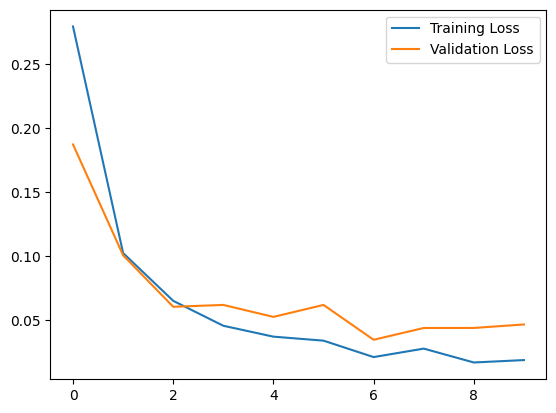

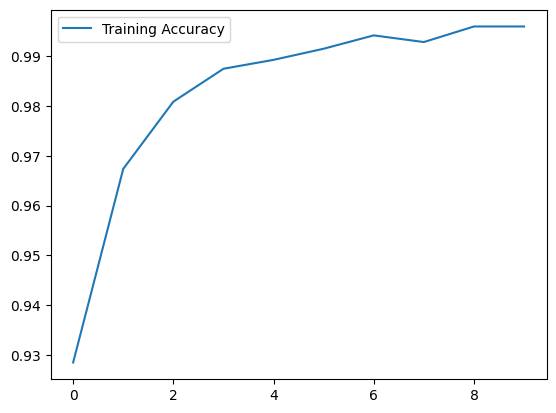

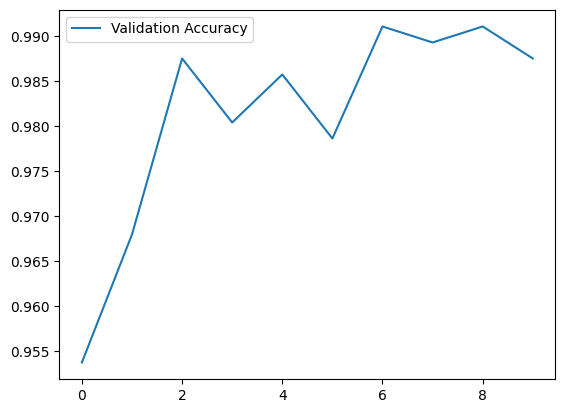

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(fit_history.history['loss'], label='Training Loss')
plt.plot(fit_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(fit_history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.show()

plt.plot(fit_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

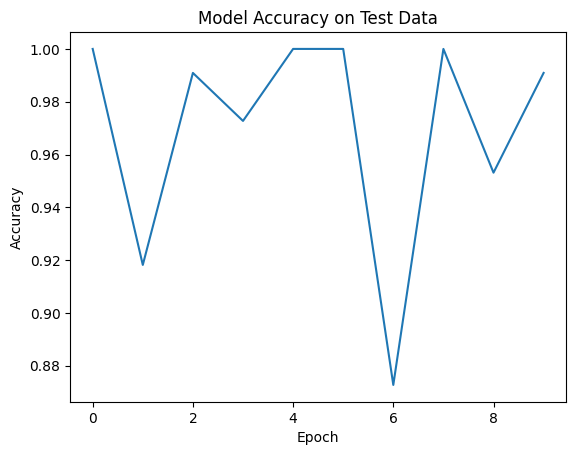

In [ ]:
# Plot the test history for accuracy
plt.plot(fit_history2.history['accuracy'])
plt.title('Model Accuracy on Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()